# **Bank Customer Churn Prediction**

-------------

## **Objective**

1. Data Encoding
2. Feature Scaling
3. Handling Imbalance Data<br>
    a. Random Under Sampling<br>
    b. Random Over Sampling
4. Support Vector Machine Classifier
5. Grid Search for Hyperparameter Tunning of SVC

## **Data Source**

Dataset is taken for this reaserch is Bank Custermer Model which is avilable at Kaggle.com <br>
Link 'https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data'

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **Describe Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Data Visualization**

In [5]:
# sns.pairplot(df)
# plt.show()

## **Data Preprocessing**

In [6]:
int(df.duplicated().sum())

0

In [7]:
df=df.set_index("CustomerId")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
#inplace is used to directly change into orignal dataset
df.replace({"Geography":{"France":2,"Germany":1,"Spain":0}},inplace=True)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17124\3522544552.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Geography":{"France":2,"Germany":1,"Spain":0}},inplace=True)


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,0,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,2,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,2,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,0,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17124\2630636614.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,0,1,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,2,1,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,2,1,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,0,1,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df["Num Of Products"].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [13]:
#clubling 2,2,4 beacuse the are less in number and not effectivly learn by the model
df.replace({"Num Of Products":{1:0,2:1,3:1,4:1}},inplace=True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1
15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0
15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1
15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0
15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0


Feature Engineering

In [14]:
df.loc[(df["Balance"]==0),"Churn"].value_counts()
#that means the number of customer who have 0 balanbce have left / chance of leveing the bank

Churn
0    3117
1     500
Name: count, dtype: int64

In [15]:
df['Zero Balance']=np.where(df["Balance"]>0,1,0)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1,0
15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0,1
15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1,1
15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0,0
15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0,1


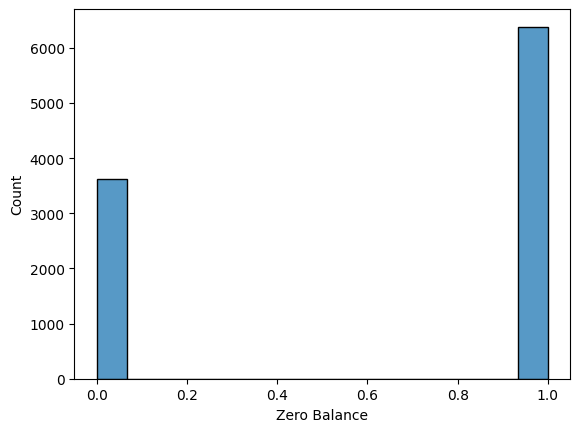

In [16]:
sns.histplot(df,x="Zero Balance")
plt.show()

## **Define Target Variable (y) and Feature Variables (X)**

In [17]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [58]:
#axis 1 means the list given is column to drop specific column to drop
#axis 0 means the list given is row to drop specific row to drop
x=df.drop(["Surname","Churn"],axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15634602,619,2,1,42,2,0.00,0,1,1,101348.88,0
15647311,608,0,1,41,1,83807.86,0,0,1,112542.58,1
15619304,502,2,1,42,8,159660.80,1,1,0,113931.57,1
15701354,699,2,1,39,1,0.00,1,0,0,93826.63,0
15737888,850,0,1,43,2,125510.82,0,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,2,0,39,5,0.00,1,1,0,96270.64,0
15569892,516,2,0,35,10,57369.61,0,1,1,101699.77,1
15584532,709,2,1,36,7,0.00,0,0,1,42085.58,0


In [57]:
y=df["Churn"]
y

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Churn, Length: 10000, dtype: int64

In [20]:
x.shape,y.shape

((10000, 11), (10000,))

In [21]:
#   handeling imbalance data becase the number of customer which are leaving is less than stay 
#   similer as number of normal transaction is huge and froudent transcations are less therefore we have to handel this data
#   this is done by 2 methods 
#   1.Under sampling in this we redeuce sample size of major veriable to equal to small veriable means 10 is normal transcations 2 is fraud transactions
#      then we try to reduce normal trascation neart to 2
#   2.Over sampling in this we increse sample size of minor veriable to equal to major veriable means 2 is fraud transcations 10 is normal transactions
#      then we try to increase fraud trascation neart to 10 bu multiplying copies of that data

In [22]:
df["Churn"].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

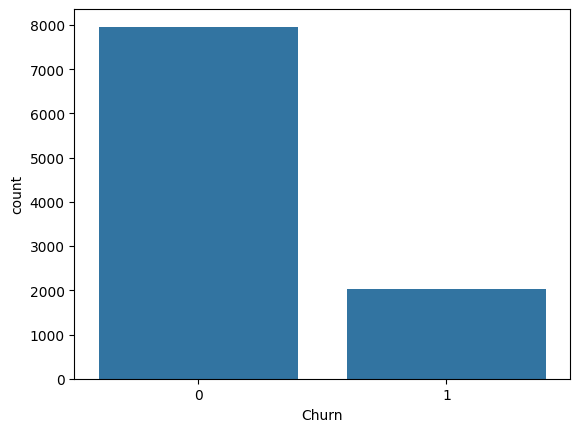

In [23]:
#this show that the data is imbalance
sns.countplot(df,x="Churn")
plt.show()

***Random under sampling***

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=2529)
x_rus,y_rus=rus.fit_resample(x,y)
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [25]:
y.value_counts(),y_rus.value_counts()

(Churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 Churn
 0    2037
 1    2037
 Name: count, dtype: int64)

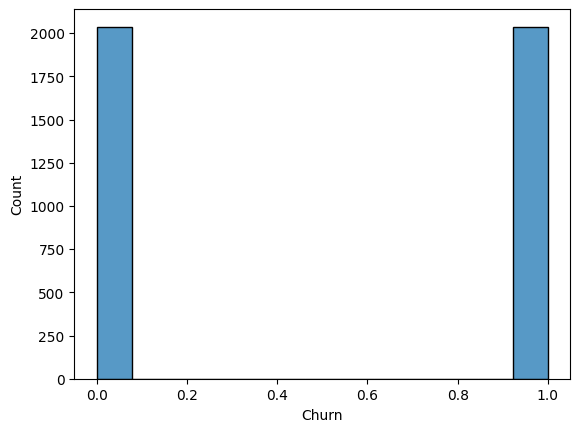

In [26]:
sns.histplot(x=y_rus)
plt.show()

***Random over sampling***

In [27]:
from imblearn.over_sampling import RandomOverSampler
ovr=RandomOverSampler(random_state=2529)
x_ovr,y_ovr=ovr.fit_resample(x,y)
x_ovr.shape,y_ovr.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [28]:
y.value_counts(),y_ovr.value_counts()

(Churn
 0    7963
 1    2037
 Name: count, dtype: int64,
 Churn
 1    7963
 0    7963
 Name: count, dtype: int64)

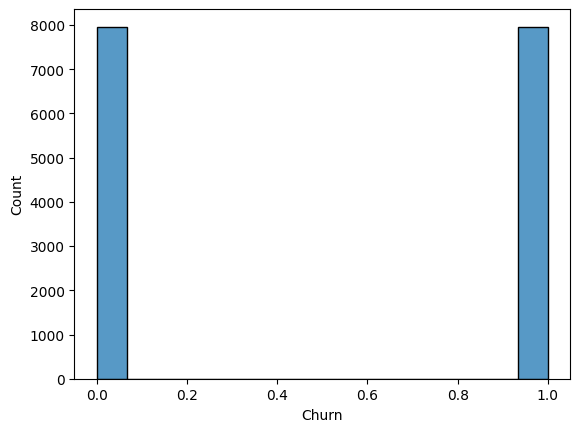

In [29]:
sns.histplot(x=y_ovr)
plt.show()

## **Train Test Split**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

***For normal data***

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

x_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])
x_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

***For Under sample data***

In [32]:
x_rus_train,x_rus_test,y_rus_train,y_rus_test=train_test_split(x_rus,y_rus,test_size=0.2)

x_rus_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_rus_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])
x_rus_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_rus_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

***For Over sample data***

In [33]:
x_ovr_train,x_ovr_test,y_ovr_train,y_ovr_test=train_test_split(x_ovr,y_ovr,test_size=0.2)

x_ovr_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_ovr_train[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])
x_ovr_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]]=sc.fit_transform(x_ovr_test[["CreditScore","Age","Tenure","Balance","Estimated Salary"]])

## **Modeling**

In [34]:
from sklearn.svm import SVC

In [35]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [36]:
y_pred=svc.predict(x_test)
print(y_pred)

[0 0 0 ... 1 0 0]


## **Model Evaluation**

***Model Evaluation for Normal data***

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as mtr
from sklearn.metrics import classification_report

In [38]:
#Hyper parameter turing
param_grid={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':["rbf"],
    "class_weight":["balanced"]
}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [39]:
print(grid.best_estimator_)
grid_prediction=grid.predict(x_test)
mtr.confusion_matrix(y_test,grid_prediction)

SVC(C=10, class_weight='balanced', gamma=1)


array([[1412,  158],
       [ 284,  146]])

In [40]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1570
           1       0.48      0.34      0.40       430

    accuracy                           0.78      2000
   macro avg       0.66      0.62      0.63      2000
weighted avg       0.76      0.78      0.76      2000



***Model Evaluation for undersample data***

In [41]:
svc_rus=SVC()
svc_rus.fit(x_rus_train,y_rus_train)

SVC()

In [42]:
y_pred_rus=svc.predict(x_rus_test)
print(y_pred_rus)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 

In [43]:
#Hyper parameter turing
param_grid={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':["rbf"],
    'class_weight':["balanced"]
}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_rus_train,y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [44]:
print(grid.best_estimator_)
grid_prediction=grid.predict(x_rus_test)
mtr.confusion_matrix(y_rus_test,grid_prediction)

SVC(C=1, class_weight='balanced', gamma=0.1)


array([[316, 101],
       [110, 288]])

In [45]:
print(classification_report(y_rus_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       417
           1       0.74      0.72      0.73       398

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



***Model Evaluation for Oversample data***

In [46]:
svc_ovr=SVC()
svc_ovr.fit(x_ovr_train,y_ovr_train)

SVC()

In [47]:
y_pred_ovr=svc.predict(x_ovr_test)
print(y_pred_rus)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 

In [48]:
#Hyper parameter turing
param_grid={
    'C':[0.1,1,10],
    'gamma':[1,0.1,0.01],
    'kernel':["rbf"],
    "class_weight":["balanced"]
}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_ovr_train,y_ovr_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [49]:
print(grid.best_estimator_)
grid_prediction=grid.predict(x_ovr_test)
mtr.confusion_matrix(y_ovr_test,grid_prediction)

SVC(C=10, class_weight='balanced', gamma=1)


array([[1398,  206],
       [  25, 1557]])

In [50]:
print(classification_report(y_ovr_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1604
           1       0.88      0.98      0.93      1582

    accuracy                           0.93      3186
   macro avg       0.93      0.93      0.93      3186
weighted avg       0.93      0.93      0.93      3186



***<center>Model SVC(C=10, class_weight='balanced', gamma=1) work well with oversample data than any other model with any data</center>***

In [51]:
model=SVC(C=10, class_weight='balanced', gamma=1)
model.fit(x_ovr_train,y_ovr_train)

SVC(C=10, class_weight='balanced', gamma=1)

## **Prediction**

In [52]:
y_p=model.predict(x_ovr_test)
print(y_p)

[1 0 1 ... 1 0 1]


In [53]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_ovr_test, y_p))

0.9274952919020716


## **Saving model for later use**

In [54]:
import pickle as pk

In [55]:
pk.dump(model,open('./model','wb'))

In [56]:
m=pk.load(open('./model','rb'))
m.predict(x_rus_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,

## **Explaination**

Bank Customer Churn Prediction aims to identify which customers are likely to leave the bank, using patterns from historical data. In this project, a Support Vector Machine (SVM) classifier is employed to make predictions, as it is effective at finding the optimal boundary between customers who stay and those who churn. However, since churn cases are often much fewer than non-churn cases, techniques like Random Over Sampling (ROS) and Random Under Sampling (RUS) are used to balance the dataset. ROS increases the number of churn cases by duplicating existing examples, while RUS reduces the number of non-churn cases by randomly removing some. These techniques help the SVM model learn more effectively from a balanced dataset, leading to more accurate and reliable predictions about customer churn.